In [1]:
import seaborn as sns
import numpy as np
import sklearn
import pandas as pd
%matplotlib inline

In [18]:
data = pd.read_csv('../data/data_excel.csv')

In [19]:
data.columns

Index(['query', 'name', 'section', 'indegree', 'outdegree', 'w_name',
       'w_name_desc', 'w_desc', 'w_lib', 'w_return_vals', 'w_env', 'w_files',
       'w_exit_status', 'w_diagnostics', 'w_errors', 'w_special_keywords',
       'w_xr_context', 'w_machine', 'w_doclen', 'w_total', 'relevance'],
      dtype='object')

In [20]:
data["query"] = data["query"].astype("category")
data["w_doclen"] = data["w_doclen"].astype("int")
data["section"] = data["section"].astype("category")
data["name"] = data["name"].astype("category")
data["section"] = data["section"].cat.codes
data["relevance"] = data["relevance"].astype("int")
#data.relevance[data.relevance <= 1] = 0
#data.relevance[data.relevance == 2] = 1
#data.relevance[data.relevance >= 2] = 1
data["relevance"] = data["relevance"].astype("category")


In [21]:
data.head()

,query,name,section,indegree,outdegree,w_name,w_name_desc,w_desc,w_lib,w_return_vals,...,w_files,w_exit_status,w_diagnostics,w_errors,w_special_keywords,w_xr_context,w_machine,w_doclen,w_total,relevance
0,abor,ftp,0,23,17,0.000000,0.000000,0.001502,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.010522,0.000000,0.0,8336,0.012024,1
1,abor,ftpd,9,27,43,0.000000,0.000000,0.001975,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.005232,0.000000,0.0,3535,0.007206,1
2,accept,accept,2,21,0,29.980744,4.612422,0.001241,0.0,0.908507,...,0.0,0.0,0.0,0.374759,0.095703,0.054395,0.0,888,36.027771,1
3,accept,BIO_s_accept,3,0,0,0.000000,11.992298,0.002940,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,809,11.995238,0
4,accept,getdate,3,0,0,0.000000,0.000000,0.000238,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,821,3.156106,0


In [22]:
data.describe()

,section,indegree,outdegree,w_name,w_name_desc,w_desc,w_lib,w_return_vals,w_env,w_files,w_exit_status,w_diagnostics,w_errors,w_special_keywords,w_xr_context,w_machine,w_doclen,w_total
count,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000
mean,4.731329,15.880696,19.454747,1.501998,0.343835,0.005188,0.044673,0.034077,0.022041,0.064776,0.072738,0.007213,0.014141,0.030211,0.031501,0.010275,5171.347152,2.182666
std,3.439934,35.830481,51.917379,6.772494,1.167192,0.017258,0.669589,0.335641,0.195704,0.580193,1.108096,0.067746,0.177566,0.200568,0.164608,0.419517,20450.677024,7.459054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000002
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,382.000000,0.001158
50%,5.000000,5.000000,5.000000,0.000000,0.000000,0.000919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1161.000000,0.037164
75%,9.000000,16.000000,14.000000,0.000000,0.026519,0.003540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004766,0.000000,0.000000,3283.500000,0.788839
max,11.000000,394.000000,355.000000,102.584015,24.320682,0.341228,18.594934,8.978864,5.474768,18.251275,38.392464,1.175460,8.242955,6.100793,3.802155,22.510092,452336.000000,105.615647


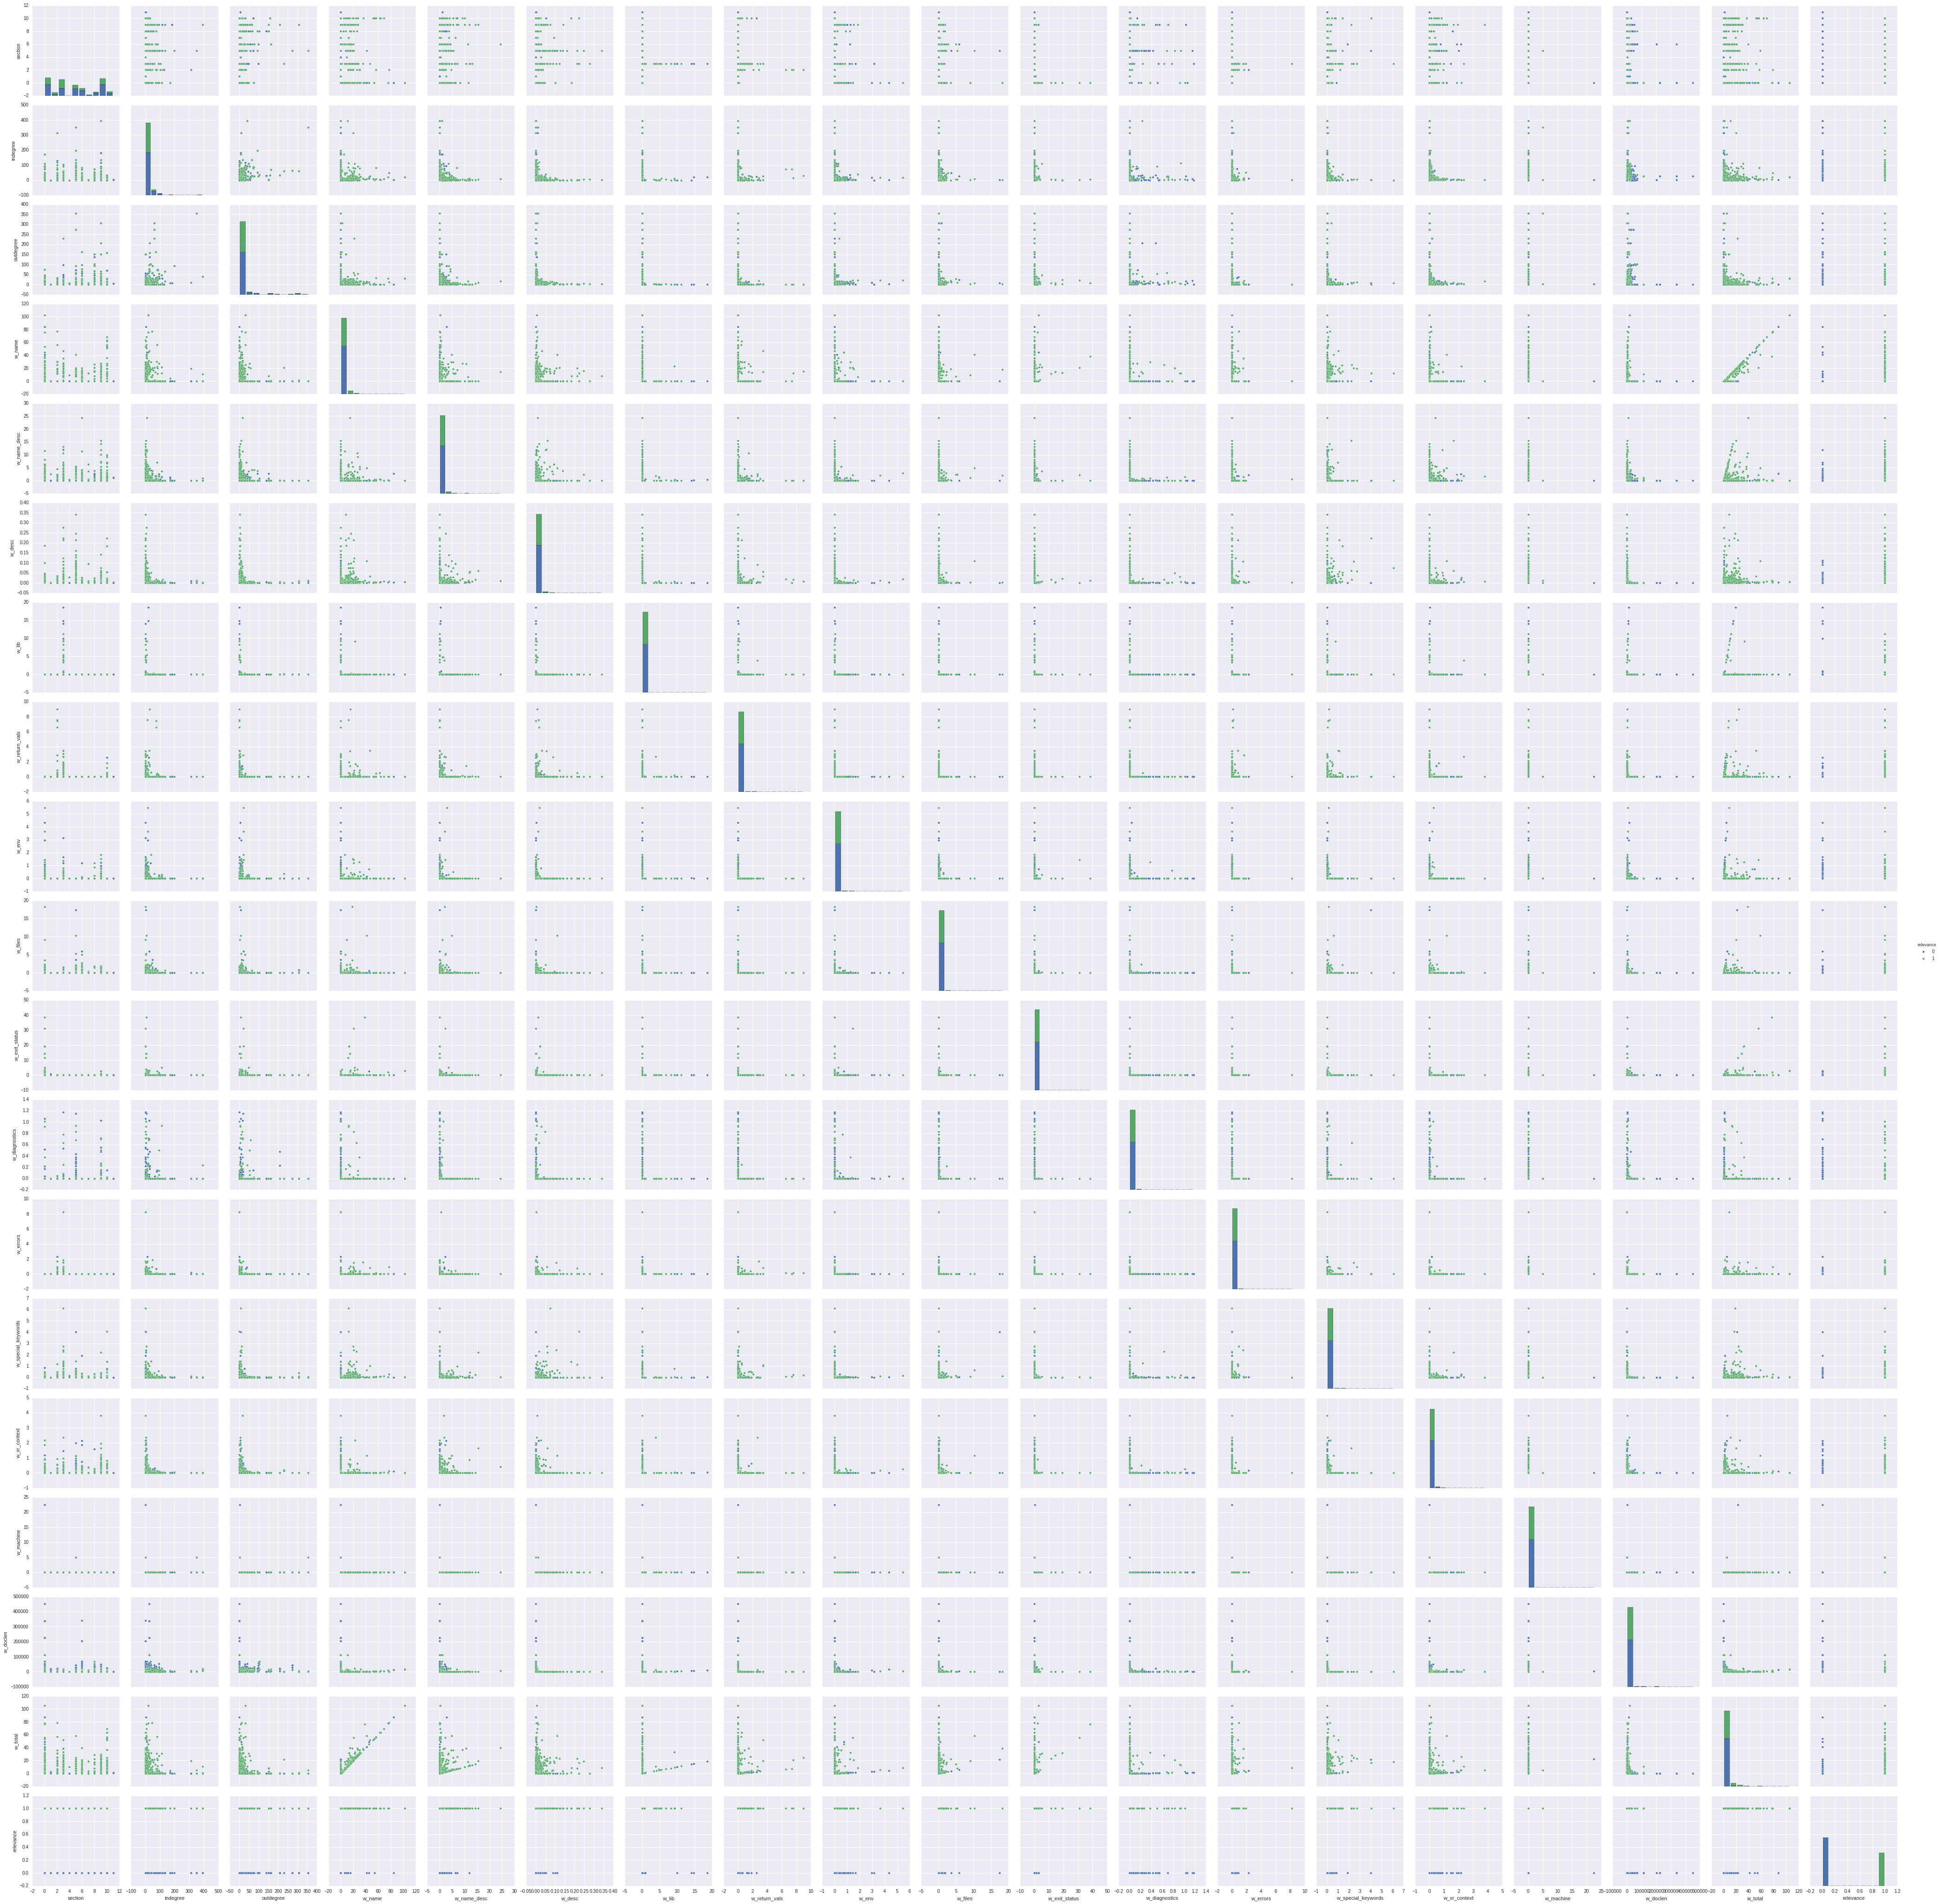

In [773]:
sns.pairplot(data, hue="relevance", size=3)

In [23]:
data.columns

Index(['query', 'name', 'section', 'indegree', 'outdegree', 'w_name',
       'w_name_desc', 'w_desc', 'w_lib', 'w_return_vals', 'w_env', 'w_files',
       'w_exit_status', 'w_diagnostics', 'w_errors', 'w_special_keywords',
       'w_xr_context', 'w_machine', 'w_doclen', 'w_total', 'relevance'],
      dtype='object')

In [96]:
X = data.ix[:, [5,6,7,9,15,16,18,19]]
y = data.ix[:, -1:]

In [97]:
#y = y.relevance.cat.codes


In [98]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.ravel(), test_size=0.20, random_state=43)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=43)

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
logistic_model = LogisticRegression(C=0.01, max_iter=500)

In [101]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
logistic_model.score(X_train, y_train)

0.75865479723046492

In [103]:
logistic_model.score(X_val, y_val)

0.74703557312252966

In [69]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)
std_X_train = scalar.transform(X_train)
std__X_val = scalar.transform(X_val)
std_X_test = scalar.transform(X_test)

In [70]:
from sklearn.neural_network import MLPClassifier

In [71]:
mlp = MLPClassifier(hidden_layer_sizes=(16,32,64,32,16,8,2), solver='sgd', momentum=0.9, learning_rate='adaptive', max_iter=10000, verbose=True,activation='tanh')

In [72]:
mlp.fit(std_X_train, y_train)

Iteration 1, loss = 0.74419936
Iteration 2, loss = 0.73364548
Iteration 3, loss = 0.72223612
Iteration 4, loss = 0.71200877
Iteration 5, loss = 0.70405203
Iteration 6, loss = 0.69758238
Iteration 7, loss = 0.69216516
Iteration 8, loss = 0.68787018
Iteration 9, loss = 0.68429115
Iteration 10, loss = 0.68134397
Iteration 11, loss = 0.67854306
Iteration 12, loss = 0.67618962
Iteration 13, loss = 0.67390857
Iteration 14, loss = 0.67173656
Iteration 15, loss = 0.66970515
Iteration 16, loss = 0.66769375
Iteration 17, loss = 0.66567461
Iteration 18, loss = 0.66364377
Iteration 19, loss = 0.66150725
Iteration 20, loss = 0.65927261
Iteration 21, loss = 0.65701054
Iteration 22, loss = 0.65470029
Iteration 23, loss = 0.65224716
Iteration 24, loss = 0.64961111
Iteration 25, loss = 0.64680405
Iteration 26, loss = 0.64397962
Iteration 27, loss = 0.64104174
Iteration 28, loss = 0.63811460
Iteration 29, loss = 0.63506541
Iteration 30, loss = 0.63218184
Iteration 31, loss = 0.62915059
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 32, 64, 32, 16, 8, 2),
       learning_rate='adaptive', learning_rate_init=0.001, max_iter=10000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [73]:
mlp.score(std__X_val, y_val)

0.77470355731225293

In [74]:
mlp.score(std_X_train, y_train)

0.79080118694362023

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc = RandomForestClassifier(n_estimators=600, max_depth=20, min_samples_split=3, n_jobs=-1)

In [77]:
rfc.fit(std_X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [78]:
rfc.score(std__X_val, y_val)

0.76877470355731226

In [79]:
rfc.score(std_X_train, y_train)

0.9990108803165183

In [80]:
rfc.feature_importances_

array([ 0.07022206,  0.06829403,  0.05615522,  0.10217559,  0.19960989,
        0.01443868,  0.05683409,  0.02403212,  0.13711476,  0.27112356])

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gboost = GradientBoostingClassifier(learning_rate=0.01, n_estimators=700, max_depth=32, max_features='log2', min_samples_split=4)

In [83]:
gboost.fit(std_X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=32,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=4, min_weight_fraction_leaf=0.0,
              n_estimators=700, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [84]:
gboost.score(std_X_train, y_train)

1.0

In [85]:
gboost.score(std__X_val, y_val)

0.76086956521739135

In [86]:
gboost.feature_importances_

array([ 0.08882333,  0.08075878,  0.03556295,  0.07939071,  0.20276349,
        0.01530834,  0.05679428,  0.02783822,  0.1687047 ,  0.24405519])

In [87]:
from sklearn.tree import ExtraTreeClassifier

In [88]:
etc = ExtraTreeClassifier(max_depth=20)
etc.fit(std_X_train, y_train)
print(etc.score(std_X_train, y_train))
print(etc.score(std__X_val, y_val))


0.815529179031
0.750988142292


In [89]:
etc.feature_importances_

array([ 0.05704074,  0.02328157,  0.13889695,  0.09865922,  0.06562078,
        0.04726584,  0.04325907,  0.0178571 ,  0.16238382,  0.34573491])

In [90]:
rfc.score(std_X_test, y_test)

0.78164556962025311

In [91]:
gboost.score(std_X_test, y_test)

0.77848101265822789

In [92]:
mlp.score(std_X_test, y_test)

0.77689873417721522

In [93]:
logistic_model.score(X_test, y_test)

0.754746835443038

In [104]:
logistic_model.coef_

array([[  1.01185649e-02,   1.32271419e-01,   1.59021144e-03,
          1.59022723e-02,   4.57151950e-03,   5.52280586e-03,
         -1.27396503e-04,   1.79920687e-01]])

In [105]:
data.columns[[5,6,7,9,15,16,18,19]]

Index(['w_name', 'w_name_desc', 'w_desc', 'w_return_vals',
       'w_special_keywords', 'w_xr_context', 'w_doclen', 'w_total'],
      dtype='object')